#### 210490L-K.P.K.A.Prabodha

# Quiz 6 - Coin Detection

### Import Libraries

In [22]:
import cv2 as cv2_lib
import numpy as np_lib
import matplotlib.pyplot as plt_lib
from skimage.feature import peak_local_max

### Load images

- Load all images in `GRAYSCALE`

In [23]:
img_coins_combined = cv2_lib.imread('images/coins/coins.png', cv2_lib.IMREAD_GRAYSCALE)
assert img_coins_combined is not None

img_dime_coin = cv2_lib.imread('images/coins/Dime.png', cv2_lib.IMREAD_GRAYSCALE)
assert img_dime_coin is not None

img_nickel_coin = cv2_lib.imread('images/coins/Nickel.png', cv2_lib.IMREAD_GRAYSCALE)
assert img_nickel_coin is not None

img_penny_coin = cv2_lib.imread('images/coins/Penny.png', cv2_lib.IMREAD_GRAYSCALE)
assert img_penny_coin is not None

img_quarter_coin = cv2_lib.imread('images/coins/Quarter.png', cv2_lib.IMREAD_GRAYSCALE)
assert img_quarter_coin is not None

### Plot all images

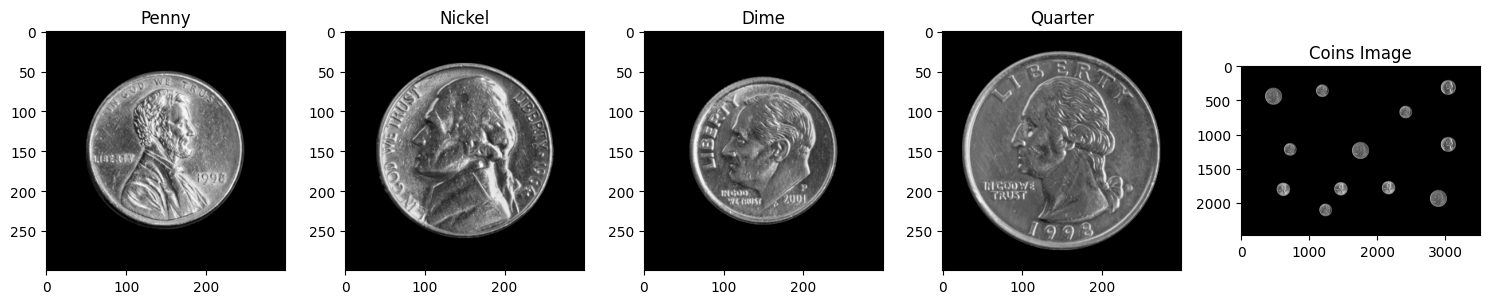

In [24]:
plt_lib.figure(figsize=(15, 10))

plt_lib.subplot(1, 5, 1)
plt_lib.imshow(img_penny_coin, cmap='gray')
plt_lib.title('Penny')

plt_lib.subplot(1, 5, 2)
plt_lib.imshow(img_nickel_coin, cmap='gray')
plt_lib.title('Nickel')

plt_lib.subplot(1, 5, 3)
plt_lib.imshow(img_dime_coin, cmap='gray')
plt_lib.title('Dime')

plt_lib.subplot(1, 5, 4)
plt_lib.imshow(img_quarter_coin, cmap='gray')
plt_lib.title('Quarter')

plt_lib.subplot(1, 5, 5)
plt_lib.imshow(img_coins_combined, cmap='gray')
plt_lib.title('Coins Image')

plt_lib.tight_layout()
plt_lib.show()

### Template Matching

- To find type of each coin in coin.png

In [25]:
response_penny_coin = cv2_lib.matchTemplate(img_coins_combined, img_penny_coin, cv2_lib.TM_CCOEFF_NORMED)
response_nickel_coin = cv2_lib.matchTemplate(img_coins_combined, img_nickel_coin, cv2_lib.TM_CCOEFF_NORMED)
response_dime_coin = cv2_lib.matchTemplate(img_coins_combined, img_dime_coin, cv2_lib.TM_CCOEFF_NORMED)
response_quarter_coin = cv2_lib.matchTemplate(img_coins_combined, img_quarter_coin, cv2_lib.TM_CCOEFF_NORMED)

# Color settings
color_codes = [
    (0, 0, 255),  # red
    (0, 255, 255),   # yellow
    (255, 0, 0),  # blue
    (0, 255, 0)  # green    
]

# Convert coins image to color
img_coins_colored = cv2_lib.cvtColor(img_coins_combined, cv2_lib.COLOR_GRAY2BGR)

# Template names and responses
coin_templates = [img_penny_coin, img_nickel_coin, img_dime_coin, img_quarter_coin]
coin_labels = ['Penny', 'Nickel', 'Dime', 'Quarter']
template_responses = [response_penny_coin, response_nickel_coin, response_dime_coin, response_quarter_coin]

# Dictionary to count the number of each coin
coin_count = {label: 0 for label in coin_labels}

# Process Templates
for idx, (template, response, label) in enumerate(zip(coin_templates, template_responses, coin_labels)):
    template_height, template_width = template.shape
    match_locations = peak_local_max(response, min_distance=20, threshold_abs=0.9)
    coin_count[label] = len(match_locations)
    for loc in match_locations:
        cv2_lib.rectangle(img_coins_colored, (loc[1], loc[0]), (loc[1] + template_width, loc[0] + template_height), color_codes[idx], 4)
        cv2_lib.putText(img_coins_colored, label, (loc[1], loc[0] - 10), cv2_lib.FONT_HERSHEY_PLAIN, 1.0, color_codes[idx], 3, cv2_lib.LINE_4)

# Draw legend
for idx, (label, color) in enumerate(zip(coin_labels, color_codes)):
    cv2_lib.rectangle(img_coins_colored, (30, 115 + 20 * idx), (50, 135 + 20 * idx), color, -1)
    cv2_lib.putText(img_coins_colored, label, (60, 130 + 20 * idx), cv2_lib.FONT_HERSHEY_PLAIN, 0.6, color, 2, cv2_lib.LINE_4)

### Display detection

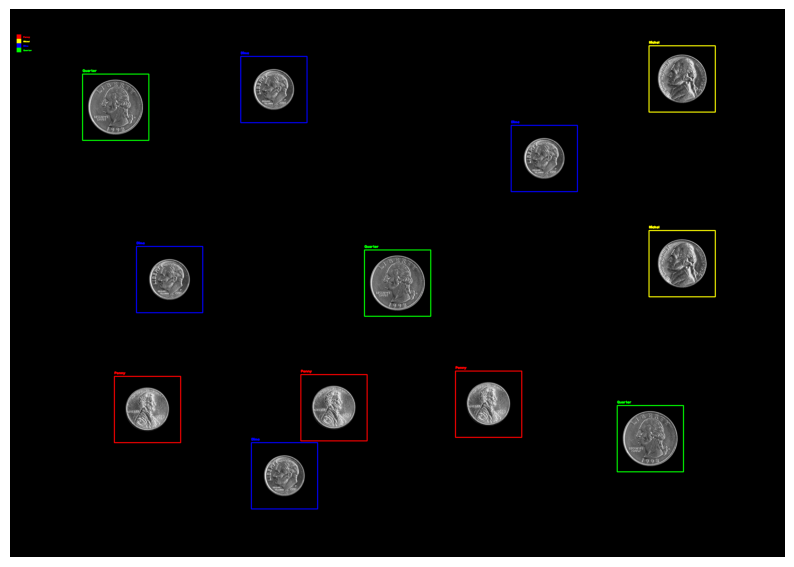

In [26]:
plt_lib.figure(figsize=(10, 10))
plt_lib.imshow(cv2_lib.cvtColor(img_coins_colored, cv2_lib.COLOR_BGR2RGB))
plt_lib.axis('off')
plt_lib.show()

### Count the Amount of Coins

In [27]:
# in dollars
value_quarter = 0.25
value_dime = 0.10
value_nickel = 0.05
value_penny = 0.01

# Print the number of each coin type
total_amount = 0
for label, count in coin_count.items():
    print(f"{label}: {count}")
    if label == "Penny":
        total_amount += count * value_penny
    elif label == "Quarter":
        total_amount += count * value_quarter
    elif label == "Nickel":
        total_amount += count * value_nickel
    elif label == "Dime":
        total_amount += count * value_dime

print(f"Total Amount of money: ${total_amount:.2f}")

Penny: 3
Nickel: 2
Dime: 4
Quarter: 3
Total Amount of money: $1.28


- Total Amount of money: ``$1.28``